### 시계열 데이터 탐색

### 시간 탐색하기

In [1]:
import pandas as pd
import matplotlib as mpl # 그림 그리기
import matplotlib.pylab as plt # 그림 그리기
import seaborn as sns 
import numpy as np

In [2]:
# 시간 유형 데이터 만들기

In [3]:
dates = ['2020-01-01', '2020-03-01', '2021-09-01']
dates

['2020-01-01', '2020-03-01', '2021-09-01']

In [6]:
ts_dates = pd.to_datetime(dates)
ts_dates

DatetimeIndex(['2020-01-01', '2020-03-01', '2021-09-01'], dtype='datetime64[ns]', freq=None)

In [7]:
ts_dates[0]

Timestamp('2020-01-01 00:00:00')

In [8]:
type(ts_dates)

pandas.core.indexes.datetimes.DatetimeIndex

In [10]:
# 날짜 형태를 기간 형태로 변환하기
pr_day = ts_dates.to_period(freq = 'D')
pr_day

PeriodIndex(['2020-01-01', '2020-03-01', '2021-09-01'], dtype='period[D]')

In [11]:
# 연월 단위로 추출
pr_month = ts_dates.to_period(freq = 'M')
pr_month

PeriodIndex(['2020-01', '2020-03', '2021-09'], dtype='period[M]')

In [12]:
# 년 단위 추출
pr_year = ts_dates.to_period(freq = 'Y')
pr_year

PeriodIndex(['2020', '2020', '2021'], dtype='period[A-DEC]')

In [13]:
file_path = 'C:/Users/admin/busan/data/timeseries.csv'
df = pd.read_csv(file_path) # df = pd.read_csv(file_path, encoding = 'euc-kr')
df

,Date,Close,Start,High,Low,Volume
0,2015-07-02,10100,10850,10900,10000,137977
1,2016-06-29,10700,10550,10900,9990,170253
2,2017-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2019-06-26,10800,10900,11000,10700,63039


In [14]:
# 타임스탬프

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    5 non-null      object
 1   Close   5 non-null      int64 
 2   Start   5 non-null      int64 
 3   High    5 non-null      int64 
 4   Low     5 non-null      int64 
 5   Volume  5 non-null      int64 
dtypes: int64(5), object(1)
memory usage: 368.0+ bytes


In [28]:
df['new_Date'] = pd.to_datetime(df['Date'])
df

,Date,Close,Start,High,Low,Volume,new_date,new_Date
0,2015-07-02,10100,10850,10900,10000,137977,2015-07-02,2015-07-02
1,2016-06-29,10700,10550,10900,9990,170253,2016-06-29,2016-06-29
2,2017-06-28,10400,10900,10950,10150,155769,2017-06-28,2017-06-28
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018-06-27
4,2019-06-26,10800,10900,11000,10700,63039,2019-06-26,2019-06-26


In [33]:
df = df.drop(['new_date'], axis = 1)
df

,Date,Close,Start,High,Low,Volume,new_Date
0,2015-07-02,10100,10850,10900,10000,137977,2015-07-02
1,2016-06-29,10700,10550,10900,9990,170253,2016-06-29
2,2017-06-28,10400,10900,10950,10150,155769,2017-06-28
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27
4,2019-06-26,10800,10900,11000,10700,63039,2019-06-26


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      5 non-null      object        
 1   Close     5 non-null      int64         
 2   Start     5 non-null      int64         
 3   High      5 non-null      int64         
 4   Low       5 non-null      int64         
 5   Volume    5 non-null      int64         
 6   new_Date  5 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 408.0+ bytes


In [34]:
df.dtypes

Date                object
Close                int64
Start                int64
High                 int64
Low                  int64
Volume               int64
new_Date    datetime64[ns]
dtype: object

In [37]:
df['new_Date'][0]

Timestamp('2015-07-02 00:00:00')

In [38]:
type(df['new_Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [43]:
# Date 컬럼 제거
df.drop(['Date'], axis = 1, inplace = True)

KeyError: "['Date'] not found in axis"

In [44]:
df

,Close,Start,High,Low,Volume,new_Date
0,10100,10850,10900,10000,137977,2015-07-02
1,10700,10550,10900,9990,170253,2016-06-29
2,10400,10900,10950,10150,155769,2017-06-28
3,10900,10800,11050,10500,133548,2018-06-27
4,10800,10900,11000,10700,63039,2019-06-26


In [50]:
# new_Date 컬럼 자체를 인덱스로 사용
df.set_index(['new_Date'], inplace = True)

KeyError: "None of ['new_Date'] are in the columns"

In [51]:
df

,Close,Start,High,Low,Volume
new_Date,,,,,
2015-07-02,10100,10850,10900,10000,137977
2016-06-29,10700,10550,10900,9990,170253
2017-06-28,10400,10900,10950,10150,155769
2018-06-27,10900,10800,11050,10500,133548
2019-06-26,10800,10900,11000,10700,63039


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5 entries, 2015-07-02 to 2019-06-26
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Close   5 non-null      int64
 1   Start   5 non-null      int64
 2   High    5 non-null      int64
 3   Low     5 non-null      int64
 4   Volume  5 non-null      int64
dtypes: int64(5)
memory usage: 240.0 bytes


In [53]:
dates = ['2020-01-01', '2020-03-01', '2021-09-01']
dates

['2020-01-01', '2020-03-01', '2021-09-01']

In [59]:
ts_dates = pd.to_datetime(dates)
ts_dates

DatetimeIndex(['2020-01-01', '2020-03-01', '2021-09-01'], dtype='datetime64[ns]', freq=None)

In [60]:
# period 함수

In [61]:
# 연도 추출
pr_year = ts_dates.to_period(freq = 'Y')
pr_year

PeriodIndex(['2020', '2020', '2021'], dtype='period[A-DEC]')

In [63]:
# 연월
pr_month = ts_dates.to_period(freq = 'm')
pr_month

PeriodIndex(['2020-01', '2020-03', '2021-09'], dtype='period[M]')

In [64]:
# 연월일
pr_day = ts_dates.to_period(freq = 'd')
pr_day

PeriodIndex(['2020-01-01', '2020-03-01', '2021-09-01'], dtype='period[D]')

### 기간 설정하기

In [67]:
timestamp_df = pd.date_range(start = '2020-01-01' # 기간의 시작점
                             , end = None # 기간의 종점
                             , periods = 6 # 기간 수
                             , freq = 'ms' # 시간 간격
                             , tz = 'asia/seoul' # 시간 기준
                            )
timestamp_df

DatetimeIndex([       '2020-01-01 00:00:00+09:00',
               '2020-01-01 00:00:00.001000+09:00',
               '2020-01-01 00:00:00.002000+09:00',
               '2020-01-01 00:00:00.003000+09:00',
               '2020-01-01 00:00:00.004000+09:00',
               '2020-01-01 00:00:00.005000+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='L')

In [69]:
# period_range 로 기간 설정
pr_y = pd.period_range(start = '2020-01-01' # 기간의 시작점
                             , end = None # 기간의 종점
                             , periods = 3 # 기간 수
                             , freq = '2y' # 시간 간격
                         )
pr_y

PeriodIndex(['2020', '2022', '2024'], dtype='period[2A-DEC]')

In [70]:
pr_m = pd.period_range(start = '2020-01-01' # 기간의 시작점
                             , end = None # 기간의 종점
                             , periods = 3 # 기간 수
                             , freq = '2m' # 시간 간격
                         )
pr_m

PeriodIndex(['2020-01', '2020-03', '2020-05'], dtype='period[2M]')

In [71]:
pr_d = pd.period_range(start = '2020-01-01' # 기간의 시작점
                             , end = None # 기간의 종점
                             , periods = 3 # 기간 수
                             , freq = '2d' # 시간 간격
                         )
pr_d

PeriodIndex(['2020-01-01', '2020-01-03', '2020-01-05'], dtype='period[2D]')

In [73]:
pr_h = pd.period_range(start = '2020-01-01' # 기간의 시작점
                             , end = None # 기간의 종점
                             , periods = 3 # 기간 수
                             , freq = '2h' # 시간 간격
                         )
pr_h

PeriodIndex(['2020-01-01 00:00', '2020-01-01 02:00', '2020-01-01 04:00'], dtype='period[2H]')

In [74]:
pr_min = pd.period_range(start = '2020-01-01' # 기간의 시작점
                             , end = None # 기간의 종점
                             , periods = 3 # 기간 수
                             , freq = '2min' # 시간 간격
                         )
pr_min

PeriodIndex(['2020-01-01 00:00', '2020-01-01 00:02', '2020-01-01 00:04'], dtype='period[2T]')

In [89]:
pr_s = pd.period_range(start = '2020-01-01' # 기간의 시작점
                             , end = None # 기간의 종점
                             , periods = 3 # 기간 수
                             , freq = '2s' # 시간 간격
                         )
pr_s

PeriodIndex(['2020-01-01 00:00:00', '2020-01-01 00:00:02',
             '2020-01-01 00:00:04'],
            dtype='period[2S]')

In [90]:
pr_test = pd.period_range(start = '2020-01-01' # 기간의 시작점
                             , end = None # 기간의 종점
                             , periods = 3 # 기간 수
                             , freq = '2d2h2min2s' # 시간 간격
                         )
pr_test

PeriodIndex(['2020-01-01 00:00:00', '2020-01-03 02:02:02',
             '2020-01-05 04:04:04'],
            dtype='period[180122S]')

In [91]:
# 컬럼 단위로 년월일 분리하기
file_path = 'C:/Users/admin/busan/data/timeseries.csv'
df = pd.read_csv(file_path) # df = pd.read_csv(file_path, encoding = 'euc-kr')
df

,Date,Close,Start,High,Low,Volume
0,2015-07-02,10100,10850,10900,10000,137977
1,2016-06-29,10700,10550,10900,9990,170253
2,2017-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2019-06-26,10800,10900,11000,10700,63039


In [92]:
df['new_Date'] = pd.to_datetime(df['Date'])
df

,Date,Close,Start,High,Low,Volume,new_Date
0,2015-07-02,10100,10850,10900,10000,137977,2015-07-02
1,2016-06-29,10700,10550,10900,9990,170253,2016-06-29
2,2017-06-28,10400,10900,10950,10150,155769,2017-06-28
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27
4,2019-06-26,10800,10900,11000,10700,63039,2019-06-26


In [102]:
# 연도만 추출
# 원 컬럼이 타임스탬프 타입이어야 가능함
df['Year'] = df['new_Date'].dt.year
df

,Date,Close,Start,High,Low,Volume,new_Date,Year,Month
0,2015-07-02,10100,10850,10900,10000,137977,2015-07-02,2015,7
1,2016-06-29,10700,10550,10900,9990,170253,2016-06-29,2016,6
2,2017-06-28,10400,10900,10950,10150,155769,2017-06-28,2017,6
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018,6
4,2019-06-26,10800,10900,11000,10700,63039,2019-06-26,2019,6


In [99]:
df = df.drop(['year'], axis =1)

KeyError: "['year'] not found in axis"

In [100]:
df

,Date,Close,Start,High,Low,Volume,new_Date,Year
0,2015-07-02,10100,10850,10900,10000,137977,2015-07-02,2015
1,2016-06-29,10700,10550,10900,9990,170253,2016-06-29,2016
2,2017-06-28,10400,10900,10950,10150,155769,2017-06-28,2017
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018
4,2019-06-26,10800,10900,11000,10700,63039,2019-06-26,2019


In [101]:
df['Month'] = df['new_Date'].dt.month
df

,Date,Close,Start,High,Low,Volume,new_Date,Year,Month
0,2015-07-02,10100,10850,10900,10000,137977,2015-07-02,2015,7
1,2016-06-29,10700,10550,10900,9990,170253,2016-06-29,2016,6
2,2017-06-28,10400,10900,10950,10150,155769,2017-06-28,2017,6
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018,6
4,2019-06-26,10800,10900,11000,10700,63039,2019-06-26,2019,6


In [103]:
df['Day'] = df['new_Date'].dt.day
df

,Date,Close,Start,High,Low,Volume,new_Date,Year,Month,Day
0,2015-07-02,10100,10850,10900,10000,137977,2015-07-02,2015,7,2
1,2016-06-29,10700,10550,10900,9990,170253,2016-06-29,2016,6,29
2,2017-06-28,10400,10900,10950,10150,155769,2017-06-28,2017,6,28
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018,6,27
4,2019-06-26,10800,10900,11000,10700,63039,2019-06-26,2019,6,26


In [105]:
# to_period() 이용하여 년월일 추출
df['Date_YY'] = df['new_Date'].dt.to_period(freq = 'y')
df['Date_YM'] = df['new_Date'].dt.to_period(freq = 'm')
df['Date_YMD'] = df['new_Date'].dt.to_period(freq = 'd')
df

,Date,Close,Start,High,Low,Volume,new_Date,Year,Month,Day,Date_YY,Date_YM,Date_YMD
0,2015-07-02,10100,10850,10900,10000,137977,2015-07-02,2015,7,2,2015,2015-07,2015-07-02
1,2016-06-29,10700,10550,10900,9990,170253,2016-06-29,2016,6,29,2016,2016-06,2016-06-29
2,2017-06-28,10400,10900,10950,10150,155769,2017-06-28,2017,6,28,2017,2017-06,2017-06-28
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018,6,27,2018,2018-06,2018-06-27
4,2019-06-26,10800,10900,11000,10700,63039,2019-06-26,2019,6,26,2019,2019-06,2019-06-26


In [118]:
df.set_index(df['new_Date'], inplace = True)
df

,Date,Close,Start,High,Low,Volume,new_Date,Year,Month,Day,Date_YY,Date_YM,Date_YMD
new_Date,,,,,,,,,,,,,
2015-07-02,2015-07-02,10100,10850,10900,10000,137977,2015-07-02,2015,7,2,2015,2015-07,2015-07-02
2016-06-29,2016-06-29,10700,10550,10900,9990,170253,2016-06-29,2016,6,29,2016,2016-06,2016-06-29
2017-06-28,2017-06-28,10400,10900,10950,10150,155769,2017-06-28,2017,6,28,2017,2017-06,2017-06-28
2018-06-27,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018,6,27,2018,2018-06,2018-06-27
2019-06-26,2019-06-26,10800,10900,11000,10700,63039,2019-06-26,2019,6,26,2019,2019-06,2019-06-26


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5 entries, 2015-07-02 to 2019-06-26
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      5 non-null      object        
 1   Close     5 non-null      int64         
 2   Start     5 non-null      int64         
 3   High      5 non-null      int64         
 4   Low       5 non-null      int64         
 5   Volume    5 non-null      int64         
 6   new_Date  5 non-null      datetime64[ns]
 7   Year      5 non-null      int64         
 8   Month     5 non-null      int64         
 9   Day       5 non-null      int64         
 10  Date_YY   5 non-null      period[A-DEC] 
 11  Date_YM   5 non-null      period[M]     
 12  Date_YMD  5 non-null      period[D]     
dtypes: datetime64[ns](1), int64(8), object(1), period[A-DEC](1), period[D](1), period[M](1)
memory usage: 560.0+ bytes


In [119]:
# 날짜 인덱스로 데이터 조회

In [135]:
df.loc['2015-07-02']

Date                 2015-07-02
Close                     10100
Start                     10850
High                      10900
Low                       10000
Volume                   137977
new_Date    2015-07-02 00:00:00
Year                       2015
Month                         7
Day                           2
Date_YY                    2015
Date_YM                 2015-07
Date_YMD             2015-07-02
Name: 2015-07-02 00:00:00, dtype: object

In [134]:
df.index

DatetimeIndex(['2015-07-02', '2016-06-29', '2017-06-28', '2018-06-27',
               '2019-06-26'],
              dtype='datetime64[ns]', name='new_Date', freq=None)

In [147]:
df.iloc[0]

Date                 2015-07-02
Close                     10100
Start                     10850
High                      10900
Low                       10000
Volume                   137977
new_Date    2015-07-02 00:00:00
Year                       2015
Month                         7
Day                           2
Date_YY                    2015
Date_YM                 2015-07
Date_YMD             2015-07-02
Name: 2015-07-02 00:00:00, dtype: object

In [148]:
df['2018-06-01' : '2019-07-31']

,Date,Close,Start,High,Low,Volume,new_Date,Year,Month,Day,Date_YY,Date_YM,Date_YMD
new_Date,,,,,,,,,,,,,
2018-06-27,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018,6,27,2018,2018-06,2018-06-27
2019-06-26,2019-06-26,10800,10900,11000,10700,63039,2019-06-26,2019,6,26,2019,2019-06,2019-06-26


In [149]:
file_path = 'C:/Users/admin/busan/data/timeseries.csv'
df = pd.read_csv(file_path) # df = pd.read_csv(file_path, encoding = 'euc-kr')
df

,Date,Close,Start,High,Low,Volume
0,2015-07-02,10100,10850,10900,10000,137977
1,2016-06-29,10700,10550,10900,9990,170253
2,2017-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2019-06-26,10800,10900,11000,10700,63039


In [150]:
df['new_Date'] = pd.to_datetime(df['Date'])
df

,Date,Close,Start,High,Low,Volume,new_Date
0,2015-07-02,10100,10850,10900,10000,137977,2015-07-02
1,2016-06-29,10700,10550,10900,9990,170253,2016-06-29
2,2017-06-28,10400,10900,10950,10150,155769,2017-06-28
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27
4,2019-06-26,10800,10900,11000,10700,63039,2019-06-26


In [151]:
df.set_index(['new_Date'], inplace = True)
df

,Date,Close,Start,High,Low,Volume
new_Date,,,,,,
2015-07-02,2015-07-02,10100,10850,10900,10000,137977
2016-06-29,2016-06-29,10700,10550,10900,9990,170253
2017-06-28,2017-06-28,10400,10900,10950,10150,155769
2018-06-27,2018-06-27,10900,10800,11050,10500,133548
2019-06-26,2019-06-26,10800,10900,11000,10700,63039


<AxesSubplot:xlabel='new_Date'>

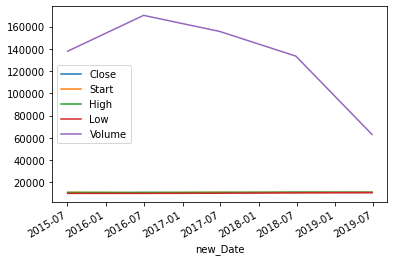

In [152]:
df.plot()

ValueError: Unrecognized character L in format string

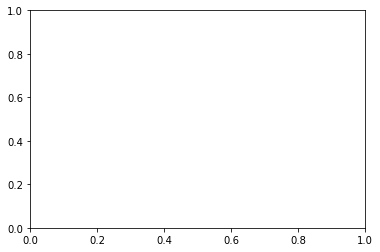

In [164]:
plt.plot('new_Date', 'Low')

In [159]:
plt.show()

### Visualization

In [165]:
# plt.rc('font', family = 'Malgun Gothic')
# scatter plot, bar plot, line plot, box plot